# Task2: Cifar10 

## 목차
1. Model  
    1.1 CNN      
    1.2 ResNet18          
    1.3 GoogLeNet           
    1.4 VGG            
    1.5 AlexNet           

# 1.1 CNN

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Input,Dropout,BatchNormalization
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np

### Data load & test-train split

In [2]:
(x_train_full, y_train_full), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [3]:
x_mean=np.mean(x_train_full,axis=(0,1,2))
x_std=np.std(x_train_full,axis=(0,1,2))

x_train_full=(x_train_full-x_mean)/x_std
x_test=(x_test - x_mean)/x_std

In [4]:
x_train,x_val,y_train,y_val=train_test_split(x_train_full,y_train_full,test_size=0.3)

### CNN Architecture

In [5]:
def model_build():
    model=Sequential()
    
    input=Input(shape=(32,32,3))
    
    output=Conv2D(filters=32,kernel_size=3,padding='same',activation='relu')(input)  #Convolution Layer, activation function은 relu
    output=BatchNormalization()(output)                                              #BatchNormalization
    output=MaxPool2D(pool_size=(2,2),strides=2,padding='same')(output)               #MaxPooling 사용
    
    output=Conv2D(filters=64,kernel_size=3,padding='same',activation='relu')(output)
    output=BatchNormalization()(output)
    output=MaxPool2D(pool_size=(2,2),strides=2,padding='same')(output)
    
    output=Conv2D(filters=128,kernel_size=3,padding='same',activation='relu')(output)
    output=BatchNormalization()(output)
    output=MaxPool2D(pool_size=(2,2),strides=2,padding='same')(output)
    output=Dropout(0.5)(output)

    output=Flatten()(output)
    output=Dense(256,activation='relu')(output)
    output=Dropout(0.5)(output)
    output=Dense(128,activation='relu')(output)
    output=Dense(10,activation='softmax')(output)  
    
    model=Model(inputs=[input],outputs=output)
    
    model.compile(optimizer=Adam(learning_rate=1e-4),loss='sparse_categorical_crossentropy', metrics=['accuracy'])   #optimizer 'adam' 사용
    
    return model

In [6]:
model=model_build()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0     

### Training

In [7]:
history= model.fit(x_train, y_train, batch_size=256, epochs=30, validation_data=(x_val, y_val))

Epoch 1/30
137/137 [==============================] - 34s 20ms/step - loss: 2.6338 - accuracy: 0.1976 - val_loss: 2.1418 - val_accuracy: 0.2151
Epoch 2/30
137/137 [==============================] - 2s 16ms/step - loss: 1.9949 - accuracy: 0.2897 - val_loss: 1.8355 - val_accuracy: 0.3337
Epoch 3/30
137/137 [==============================] - 2s 16ms/step - loss: 1.8270 - accuracy: 0.3362 - val_loss: 1.6071 - val_accuracy: 0.4258
Epoch 4/30
137/137 [==============================] - 2s 16ms/step - loss: 1.7107 - accuracy: 0.3753 - val_loss: 1.5025 - val_accuracy: 0.4645
Epoch 5/30
137/137 [==============================] - 2s 16ms/step - loss: 1.6399 - accuracy: 0.4000 - val_loss: 1.4579 - val_accuracy: 0.4876
Epoch 6/30
137/137 [==============================] - 2s 16ms/step - loss: 1.5658 - accuracy: 0.4263 - val_loss: 1.4010 - val_accuracy: 0.5094
Epoch 7/30
137/137 [==============================] - 2s 16ms/step - loss: 1.5159 - accuracy: 0.4475 - val_loss: 1.3616 - val_accuracy: 0.519

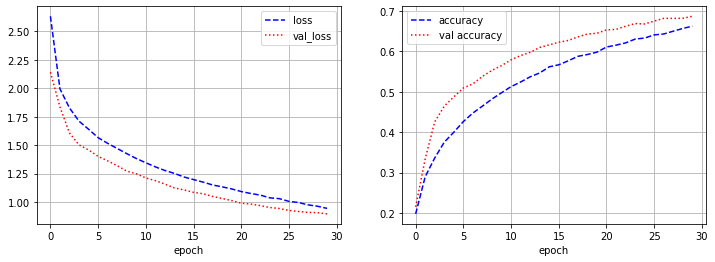

In [8]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b--', label='loss')
plt.plot(history.history['val_loss'], 'r:', label='val_loss')
plt.xlabel('epoch')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'b--', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r:', label='val accuracy')
plt.xlabel('epoch')
plt.grid()
plt.legend()

plt.show()

In [9]:
test_prediction = model.predict(x_test)

In [10]:
test_prediction

array([[1.48132332e-02, 9.15120170e-03, 3.28102075e-02, ...,
        2.15520132e-02, 3.69837210e-02, 1.33853005e-02],
       [1.93471741e-02, 6.64481640e-01, 9.10916356e-07, ...,
        3.43024766e-07, 2.98223019e-01, 1.79455634e-02],
       [1.84516877e-01, 3.61586392e-01, 5.16044628e-03, ...,
        2.93285190e-03, 3.73572052e-01, 6.79719597e-02],
       ...,
       [4.74467687e-03, 2.13693071e-04, 1.47005558e-01, ...,
        7.16140419e-02, 3.54968797e-04, 6.84203056e-04],
       [1.08611695e-01, 3.18524778e-01, 9.80441496e-02, ...,
        1.23720311e-01, 2.45672762e-02, 4.35777381e-02],
       [1.51601726e-05, 8.93349625e-06, 3.11827956e-04, ...,
        9.88282859e-01, 1.72827504e-06, 9.16584941e-06]], dtype=float32)

.

# 1.2 ResNet18

ResNet은 convolution filter를 두개씩 묶어 Residual Function형태로 학습하게 만들고, 
점선으로 표시된 부분은 입력단과 출력단의 Dimension이 맞지 않아 맞춰주는 테크닉이 가미된 shortcut connection이다.그래서 34짜리 3-4-3-4-..요런식으로 묶어줌.

입력단과 출력단이 같으면 그냥 identity mapping을 쓸 수 있다. 
그렇지 않으면 side에 padding을 붙이거나 projection연산을 이용한 shortcut connection을 이용해 구현하는 방법이 있다. 
실제 구현상 매 convolution마다 batchnormalization을 이용한다. 
learning_rate도 점차 줄여나가게 하는 테크닉을 쓰고, weight decay=0.0001값과 momentum=0.9로 파라미터 조정해서 학습시킨다.

ResNet은 깊어질 수록(깊은 layer)가 얕은 Layer보다 잘 동작하고 training error또한 줄어들고, 일반화 성능 또한 다른모델에 비해 높다.

ResNet 학습 시 3가지 경우의 수가 있다.
- zero padding 을 이용해 dimension 증가하고 identity mapping 적용   
- dimension 증가할때만 projection연산    
- 모든 shortcut에 projection을 수행   

다만, projection shortcut이 엄청난 성능변화를 주진 않아 필수는 아니다. 

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.backends.cudnn as cudnn
import torch.optim as optim
import os

### BasicBlock
BasicBlock은 2개의 convolution layer로 구성되며, 하나의 [3x3,64] layer를 거친뒤 BatchNormalization -> 'relu' 후
그다음 레이어로 돌아가고, 그 다음레이어도 앞과 똑같은 과정을 거친다. 대신 입력으로 들어오는 input이 identity mapping이용해 2번째 convolution을 거친 결과에 더해질 수 있도록 만들고, 그 위에 'relu'를 씌운다.

In [ ]:
# ResNet18을 위해 BasicBlock 클래스 정의
class BasicBlock(nn.Module):
    def __init__(self, in_planes, planes, stride=1):
        super(BasicBlock, self).__init__()

        # 3x3 필터를 사용 (Dimension줄일 땐, stride 값 조절)
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)   #하나의 convolution layer 거치고
        self.bn1 = nn.BatchNorm2d(planes) # 배치 정규화(batch normalization)                             #BatchNormalization 한다

        # 3x3 필터를 사용 (패딩을 1만큼 주기 때문에 너비와 높이가 동일)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=1, padding=1, bias=False)          #2번째 convolution 거치고
        self.bn2 = nn.BatchNorm2d(planes)                                                               #BatchNormalization 한다

        self.shortcut = nn.Sequential() # identity인 경우                                               #shortcut connection을 위해 mapping을 수행하도록 한다.
        if stride != 1: # stride가 1이 아니라면, Identity mapping이 아닌 경우
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, planes, kernel_size=1, stride=stride, bias=False),                 # stride가 1이 아니면 Dimension이 다르단 의미니 ,위에서 말한 테크닉을 쓴다
                nn.BatchNorm2d(planes)                                                                  # stride를 거쳐 입력값이 connection되게 만든다. 
            )

    def forward(self, x):                                                                             
        out = F.relu(self.bn1(self.conv1(x)))                                                         #첫번째 convolution,batchnormalization,relu거치고
        out = self.bn2(self.conv2(out))                                                               #두번째 convolution,batchnormalization거치고
        out += self.shortcut(x) # (핵심) skip connection                                              # 그 다음 x를 mapping해줄 수 있게 하고, 그 결과에
        out = F.relu(out)                                                                             # relu를 씌운다. 여기까지 forward path구성
        return out

### ResNet Architecture

In [ ]:
# ResNet 정의
# 위의 BasicBlock을 여러번 연결하는 방식으로 구현됨.
class ResNet(nn.Module):                                                             
    def __init__(self, block, num_blocks, num_classes=10):    #block의 개수 입력받을 수 있음 ,CiFar10은 class개수 10개라
        super(ResNet, self).__init__()
        self.in_planes = 64

        # 64개의 3x3 필터(filter)를 사용  
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
        self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)
        self.linear = nn.Linear(512, num_classes)                            #Fullyconnected Layer

    def _make_layer(self, block, planes, num_blocks, stride):               # BasicBlock이 연속될 수 있게끔 만들어줌. 즉, 이어붙임.
        strides = [stride] + [1] * (num_blocks - 1)                         # 첫번째 convolution 연산에 의해서만 너비와 높이(Dimension)이 줄어들 수 있게 만들고 
        layers = []                                                         # stride=2로 설정해서 줄어들게 만듬.
        for stride in strides:                                              #그 다음 이어붙히는 것은 다 같은 Dimension만 되게 한다.
            layers.append(block(self.in_planes, planes, stride))
            self.in_planes = planes # 다음 레이어를 위해 채널 수 변경
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = F.avg_pool2d(out, 4)                                         #Maxpooling이 아닌 avgpooling을 사용한다.
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out


# ResNet18 함수 정의
def ResNet18():
    return ResNet(BasicBlock, [2, 2, 2, 2])  #각각의 Basicblock이 2번씩 중첩되어 사용할 수 있게 명시

### 데이터(Dataset) 다운로드

In [ ]:
import torchvision
import torchvision.transforms as transforms

transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),     # Horizontal Flop을 통해 data augmentation하는 방법이 널리쓰인다.
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=4)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=100, shuffle=False, num_workers=4)


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


### 환경 설정

In [ ]:
device = 'cuda'

net = ResNet18()
net = net.to(device)
net = torch.nn.DataParallel(net)
cudnn.benchmark = True

### 학습(Training) 함수 정의

In [ ]:
file_name = 'resnet18_cifar10.pt' #학습이 진행됨에 따라 이런 이름으로 모델파일 저장.
learning_rate = 0.1       #learning_rate 설정
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9, weight_decay=0.0002)

In [ ]:
def train(epoch):
    print('\n[ Train epoch: %d ]' % epoch)
    net.train()
    train_loss = 0
    correct = 0
    total = 0
    for batch_idx, (inputs, targets) in enumerate(train_loader):  #train_loader로 매번 batch_size마다 데이터를 뽑아내서
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()

        benign_outputs = net(inputs)                             # 그 데이터를 넷에 넣은뒤
        loss = criterion(benign_outputs, targets)                # cross_entropy loss에 따라
        loss.backward()                                          # backpropagation 진행한다.

        optimizer.step()
        train_loss += loss.item()
        _, predicted = benign_outputs.max(1)                    # loss 값 출력할 수 있게

        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()
        
        if batch_idx % 100 == 0:
            print('\nCurrent batch:', str(batch_idx))
            print('Current benign train accuracy:', str(predicted.eq(targets).sum().item() / targets.size(0)))
            print('Current benign train loss:', loss.item())

    print('\nTotal benign train accuarcy:', 100. * correct / total)
    print('Total benign train loss:', train_loss)

In [ ]:
def test(epoch):
    print('\n[ Test epoch: %d ]' % epoch)  #epoch끝날때마다 정확도와 loss값 출력하게 만듬
    net.eval()
    loss = 0
    correct = 0
    total = 0

    for batch_idx, (inputs, targets) in enumerate(test_loader):
        inputs, targets = inputs.to(device), targets.to(device)
        total += targets.size(0)

        outputs = net(inputs)
        loss += criterion(outputs, targets).item()

        _, predicted = outputs.max(1)
        correct += predicted.eq(targets).sum().item()

    print('\nTest accuarcy:', 100. * correct / total)
    print('Test average loss:', loss / total)

    state = {
        'net': net.state_dict()
    }
    if not os.path.isdir('checkpoint'):
        os.mkdir('checkpoint')
    torch.save(state, './checkpoint/' + file_name)
    print('Model Saved!')

In [ ]:
def adjust_learning_rate(optimizer, epoch):            #학습이 진행됨에 따라 learning_rate를 낮춰준다. epoch 200번정도 될때 적용가능
    lr = learning_rate                                 
    if epoch >= 100:                                   # 100번에서 learning_rate 1/10로 줄여줌.
        lr /= 10
    if epoch >= 150:
        lr /= 10                                       # 150번에서 learning_rate 1/10로 줄여줌.
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

### Training

In [ ]:
for epoch in range(0, 20):
    adjust_learning_rate(optimizer, epoch)
    train(epoch)
    test(epoch)


[ Train epoch: 0 ]


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))



Current batch: 0
Current benign train accuracy: 0.09375
Current benign train loss: 2.5149853229522705

Current batch: 100
Current benign train accuracy: 0.2578125
Current benign train loss: 1.9480993747711182

Current batch: 200
Current benign train accuracy: 0.3359375
Current benign train loss: 1.7385276556015015

Current batch: 300
Current benign train accuracy: 0.4140625
Current benign train loss: 1.5578272342681885

Total benign train accuarcy: 29.802
Total benign train loss: 759.0298014879227

[ Test epoch: 0 ]

Test accuarcy: 40.81
Test average loss: 0.01645215106010437
Model Saved!

[ Train epoch: 1 ]

Current batch: 0
Current benign train accuracy: 0.359375
Current benign train loss: 1.7730096578598022

Current batch: 100
Current benign train accuracy: 0.4375
Current benign train loss: 1.4899464845657349

Current batch: 200
Current benign train accuracy: 0.375
Current benign train loss: 1.5350602865219116

Current batch: 300
Current benign train accuracy: 0.4453125
Current ben

.

# 1.3 googLeNet

googLeNet이 아주 딥한 신경망으로 구성되어 학습이 가능했던 것은 Inception Module 때문입니다. 

Inception Module은 입력값에 대해 , 4가지 종류의 Convolution,Pooling을 수행하고, 4개 결과를 채널방향으로 합칩니다. 이러한 Inception Module이 모델에 총 9개가 있습니다.

1) 1x1 convolution       
2) 1x1 convolution + 3x3 convolution        
3) 3x3 convolution + 5x5 convolution         
4) 3x3 MaxPooling + 1x1 convolution         

이 4개의 연산결과를 featuremap을 쌓습니다.

3x3 MaxPooling에서 입력과 출력의 Dimension같아야하므로 Pooling에서 Padding을 추가해주는 방식입니다.

In [3]:
import tensorflow as tf

### inception block 정의

1x1 convolution 연산의 장점으로 featuremap의 갯수를 줄이는 것 입니다. featuremap의 갯수가 줄어들면 그만큼 연산량이 줄어듭니다.      

In [4]:
def inception_block(in_layer, n1x1, n3x3r, n3x3, n5x5r, n5x5, npool, reduce=False):
    block_1x1 = tf.keras.layers.Conv2D(n1x1, (1, 1), padding='SAME', activation='relu')(in_layer)

    block_3x3 = tf.keras.layers.Conv2D(n3x3r, (1, 1), padding='SAME', activation='relu')(in_layer)
    block_3x3 = tf.keras.layers.Conv2D(n3x3, (3, 3), padding='SAME', activation='relu')(block_3x3)

    block_5x5 = tf.keras.layers.Conv2D(n5x5r, (1, 1), padding='SAME', activation='relu')(in_layer)
    block_5x5 = tf.keras.layers.Conv2D(n5x5, (5, 5), padding='SAME', activation='relu')(block_5x5)

    block_pool = tf.keras.layers.MaxPool2D((3, 3), strides=(1, 1), padding='SAME')(in_layer)
    block_pool = tf.keras.layers.Conv2D(npool, (1, 1), padding='SAME', activation='relu')(block_pool)

    block = tf.keras.layers.Concatenate()([block_1x1, block_3x3, block_5x5, block_pool])

    if reduce:
        block = tf.keras.layers.MaxPool2D((3, 3), strides=(2, 2), padding='SAME')(block)

    return block

### Data load & test-train Split

In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

170500096/170498071 [==============================] - 2s 0us/step


### googLeMet Architecture

In [6]:
input_layer = tf.keras.layers.Input(shape=(32, 32, 3))

stem_layer = tf.keras.layers.Conv2D(32, (3, 3), strides=(1, 1), padding='SAME', activation='relu')(input_layer)
# Max Pooling Here on Original Inception (3x3, stride=2)
stem_layer = tf.keras.layers.Conv2D(64, (3, 3), strides=(1, 1), padding='SAME', activation='relu')(stem_layer)
# Max Pooling Here on Original Inception (3x3, stride=2)

inception_block3a = inception_block(stem_layer, 32, 48, 64, 8, 16, 16, reduce=False) # 32x32x128
inception_block3b = inception_block(inception_block3a, 64, 64, 96, 16, 48, 32, reduce=True) # 16x16x240

inception_block4a = inception_block(inception_block3b, 96, 48, 104, 8, 24, 32, reduce=False) # 16x16x256
inception_block4b = inception_block(inception_block4a, 80, 56, 112, 12, 32, 32, reduce=False) # 16x16x256
inception_block4c = inception_block(inception_block4b, 64, 64, 128, 12, 32, 32, reduce=False) # 16x16x256
inception_block4d = inception_block(inception_block4c, 56, 72, 144, 16, 32, 32, reduce=False) # 16x16x264
inception_block4e = inception_block(inception_block4d, 128, 80, 160, 16, 64, 64, reduce=True) # 8x8x416

inception_block5a = inception_block(inception_block4e, 128, 80, 160, 16, 64, 64, reduce=False) # 8x8x416
inception_block5b = inception_block(inception_block5a, 192, 96, 192, 24, 64, 64, reduce=False) # 8x8x512

#googLeNet은 Fully connected 방식대신에 global average pooling을 쓴다. 1차원으로 만들어 softmax층과 연결해준다
avg_pool = tf.keras.layers.GlobalAveragePooling2D()(inception_block5b) # 512
dropout = tf.keras.layers.Dropout(0.4)(avg_pool)
out_layer = tf.keras.layers.Dense(10, activation='softmax')(dropout)

In [7]:
model = tf.keras.models.Model(input_layer, out_layer)

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 32)   896         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 64)   18496       conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 32, 32, 48)   3120        conv2d_1[0][0]                   
______________________________________________________________________________________________

In [9]:
history=model.fit(x_train, y_train, batch_size=128, epochs=10,
          validation_data=(x_test, y_test))

Epoch 1/10
391/391 [==============================] - 105s 175ms/step - loss: 2.0765 - accuracy: 0.1923 - val_loss: 1.7266 - val_accuracy: 0.3526
Epoch 2/10
391/391 [==============================] - 65s 165ms/step - loss: 1.5486 - accuracy: 0.4166 - val_loss: 1.4160 - val_accuracy: 0.4812
Epoch 3/10
391/391 [==============================] - 65s 166ms/step - loss: 1.2484 - accuracy: 0.5444 - val_loss: 1.1975 - val_accuracy: 0.5672
Epoch 4/10
391/391 [==============================] - 65s 166ms/step - loss: 1.0445 - accuracy: 0.6259 - val_loss: 0.9551 - val_accuracy: 0.6605
Epoch 5/10
391/391 [==============================] - 65s 166ms/step - loss: 0.8920 - accuracy: 0.6844 - val_loss: 0.8541 - val_accuracy: 0.6983
Epoch 6/10
391/391 [==============================] - 65s 166ms/step - loss: 0.7886 - accuracy: 0.7227 - val_loss: 0.7750 - val_accuracy: 0.7249
Epoch 7/10
391/391 [==============================] - 65s 166ms/step - loss: 0.6949 - accuracy: 0.7583 - val_loss: 0.7515 - val_a

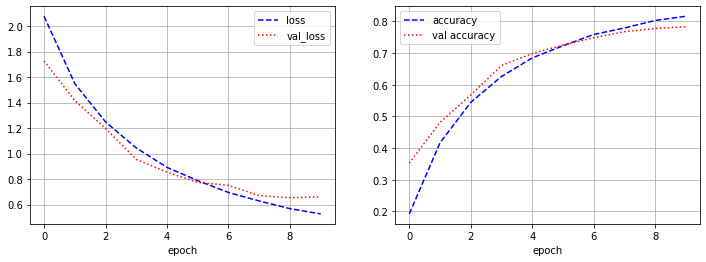

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b--', label='loss')
plt.plot(history.history['val_loss'], 'r:', label='val_loss')
plt.xlabel('epoch')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'b--', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r:', label='val accuracy')
plt.xlabel('epoch')
plt.grid()
plt.legend()

plt.show()

.

# 1.4 VGG

In [ ]:
import tensorflow as tf
import numpy as np

### Data load & train-test split

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0


170500096/170498071 [==============================] - 2s 0us/step


### vgg_block 정의
VGG 연구팀은 깊이의 영향만을 최대한 확인하고자 convolution filter size는 가장 작은 3 x 3으로 고정했습다.그러므로 여기서도 3x3으로 고정시켜줄 것입니다.

In [ ]:
def vgg_block(in_layer, n_conv, n_filter, filter_size=(3, 3), reduce_size=True): 
    layer = in_layer
    for i in range(n_conv):
        layer = tf.keras.layers.Conv2D(n_filter, filter_size, padding='SAME', activation='relu')(layer)

    if reduce_size:
        layer = tf.keras.layers.MaxPool2D((2, 2))(layer)
    return layer

### VGG Architecture

In [ ]:
input_layer = tf.keras.layers.Input(shape=(32, 32, 3)) #cifar dimension
vgg_block01 = vgg_block(input_layer, 2, 32) # 16x16x32
vgg_block02 = vgg_block(vgg_block01, 2, 64) # 8x8x64
vgg_block03 = vgg_block(vgg_block02, 3, 128) # 4x4x128

flatten = tf.keras.layers.Flatten()(vgg_block03) # 2048
dense01 = tf.keras.layers.Dense(512, activation='relu')(flatten)
output = tf.keras.layers.Dense(10, activation='softmax')(dense01)

In [ ]:
model = tf.keras.models.Model(input_layer, output)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0     

In [ ]:
history=model.fit(x_train, y_train, batch_size=64, epochs=10,
          validation_data=(x_test, y_test))

Epoch 1/10
782/782 [==============================] - 39s 9ms/step - loss: 1.6786 - accuracy: 0.3761 - val_loss: 1.4553 - val_accuracy: 0.4702
Epoch 2/10
782/782 [==============================] - 7s 9ms/step - loss: 1.1382 - accuracy: 0.5913 - val_loss: 1.0644 - val_accuracy: 0.6149
Epoch 3/10
782/782 [==============================] - 7s 9ms/step - loss: 0.8908 - accuracy: 0.6834 - val_loss: 0.8789 - val_accuracy: 0.6957
Epoch 4/10
782/782 [==============================] - 7s 9ms/step - loss: 0.7493 - accuracy: 0.7349 - val_loss: 0.7730 - val_accuracy: 0.7346
Epoch 5/10
782/782 [==============================] - 7s 9ms/step - loss: 0.6348 - accuracy: 0.7780 - val_loss: 0.7303 - val_accuracy: 0.7525
Epoch 6/10
782/782 [==============================] - 7s 9ms/step - loss: 0.5443 - accuracy: 0.8061 - val_loss: 0.7697 - val_accuracy: 0.7438
Epoch 7/10
782/782 [==============================] - 7s 9ms/step - loss: 0.4542 - accuracy: 0.8392 - val_loss: 0.7531 - val_accuracy: 0.7552
Epoch

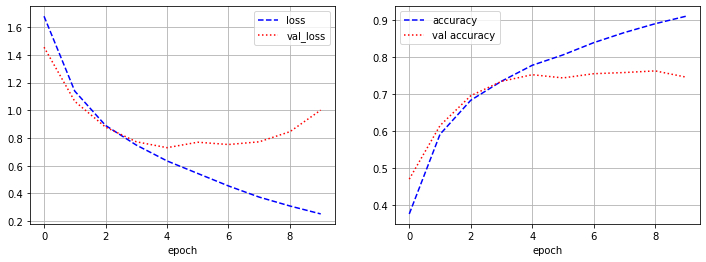

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b--', label='loss')
plt.plot(history.history['val_loss'], 'r:', label='val_loss')
plt.xlabel('epoch')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'b--', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r:', label='val accuracy')
plt.xlabel('epoch')
plt.grid()
plt.legend()

plt.show()

.

# 1.5 AlexNet
AlexNet은 8개의 레이어로 구성되어 있습니다. 5개의 컨볼루션 레이어와 3개의 full-connected 레이어로 구성되며. 두번째, 네번째, 다섯번째 컨볼루션 레이어들은 전 단계의 같은 채널의 특성맵들과만 연결되어 있는 반면, 세번째 컨볼루션 레이어는 전 단계의 두 채널의 특성맵들과 모두 연결되어 있습니다

In [ ]:
import numpy as np 
import pandas as pd 
import os
import torch.nn as nn
import torch.utils.data
import time

### 데이터(Dataset) 다운로드

In [ ]:
import torchvision
import torchvision.transforms as transforms

transform= transforms.Compose(
    [   transforms.Resize(256),          #AlexNet은 256 input size원해서 resize해줌
     transforms.RandomHorizontalFlip(),  # Horizontal Flip을 통해 data augmentation하는 방법이 널리쓰인다.
     transforms.ToTensor(),
     transforms.Normalize([0.49139968, 0.48215841, 0.44653091], [0.24703223 , 0.24348513, 0.26158784]) #image 평균 및 표준편차
    ])

#train & test set
trainset= torchvision.datasets.CIFAR10(root='./data', train=True, transform=transform,
                                      download=True)
testset= torchvision.datasets.CIFAR10(root='./data', train=False, transform=transform,
                                     download=True)

trainloader= torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True,
                                        num_workers=8)
testloader= torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False,
                                       num_workers=8)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


아래 코드는 각 채널에 대한 그림의 평균 및 표준 편차를 얻습니다.      
이미지를 정규화하는 데 쓰입니다

In [ ]:
train_means= trainset.data.mean(axis=(0,1,2))/255
train_means

array([0.49139968, 0.48215841, 0.44653091])

In [ ]:
train_stds= trainset.data.std(axis=(0,1,2))/255
train_stds

array([0.24703223, 0.24348513, 0.26158784])

### 검증 데이터

In [ ]:
from torch.utils.data import Subset
#train에서 검증데이터 분리합니다 75:25
def train_valid_split(dl, val_split=0.25):
    total_items= dl.dataset.data.shape[0]
    idxs= np.random.permutation(total_items)
    train_idxs, valid_idxs= idxs[round(total_items*val_split):], idxs[:round(total_items*val_split)]
    
    train= Subset(dl, train_idxs)
    valid= Subset(dl, valid_idxs)
    return train, valid

In [ ]:
train_dl, valid_dl= train_valid_split(trainloader)

### 이미지 출력

In [ ]:
import matplotlib.pyplot as plt
def show_image(img):
    img= img.numpy()
    plt.imshow(np.transpose(img, (1, 2, 0)))
    plt.show()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


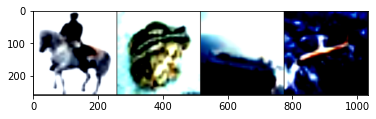

In [ ]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
show_image(torchvision.utils.make_grid(images[:4]))

In [ ]:
[classes[each] for each in labels[:4]]

['horse', 'frog', 'ship', 'plane']

### 환경설정 
가능하면 gpu를 사용할 수 있게 만들어줍니다.

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# trainloader.to(device);
print(device)

cuda:0


### AlexNet Architecture

In [ ]:
class AlexNet(nn.Module):
    def __init__(self, num_classes=10): #CiFar10은 class개수 10개라
        super(AlexNet, self).__init__()
         
        #첫번째 레이어(컨볼루션 레이어): 96개의 11 x 11 x 3 사이즈 필터커널로 입력 영상을 컨볼루션해준다.
        self.features= nn.Sequential(
        nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=0), #컨볼루션 보폭(stride)를 4로 설정했고, zero-padding은 사용하지 않았다.
        nn.ReLU(inplace=True),   #결과적으로 55 x 55 x 96 특성맵(96장의 55 x 55 사이즈 특성맵들)이 산출된다. 그 다음에 ReLU 함수로 활성화해준다.
        nn.MaxPool2d(kernel_size=3, stride=2),  #이어서 3 x 3 overlapping max pooling이 stride 2로 시행된다. 그 결과 27 x 27 x 96 특성맵을 갖게 된다.                                          
                                    
        #두번째 레이어(컨볼루션 레이어): 256개의 5 x 5 x 48 커널을 사용하여 전 단계의 특성맵을 컨볼루션해준다. 
        nn.Conv2d(96, 256, kernel_size=5, stride=1, padding=2), #stride는 1로, zero-padding은 2로 설정했다. 
        nn.ReLU(inplace=True), #따라서 27 x 27 x 256 특성맵(256장의 27 x 27 사이즈 특성맵들)을 얻게 된다. 역시 ReLU 함수로 활성화한다.
        nn.MaxPool2d(kernel_size=3, stride=2), #그 다음에 3 x 3 overlapping max pooling을 stride 2로 시행한다. 그 결과 13 x 13 x 256 특성맵을 얻게 된다. 
        
        #세번째 레이어(컨볼루션 레이어): 384개의 3 x 3 x 256 커널을 사용하여 전 단계의 특성맵을 컨볼루션해준다.   
        nn.Conv2d(256, 384, kernel_size=3, stride=1, padding=1), #stride와 zero-padding 모두 1로 설정한다.
        nn.ReLU(inplace=True), #따라서 13 x 13 x 384 특성맵(384장의 13 x 13 사이즈 특성맵들)을 얻게 된다. 역시 ReLU 함수로 활성화한다.
        
        #네번째 레이어(컨볼루션 레이어): 384개의 3 x 3 x 192 커널을 사용해서 전 단계의 특성맵을 컨볼루션해준다.
        nn.Conv2d(384, 384, kernel_size=3, stride=1, padding=1), #stride와 zero-padding 모두 1로 설정한다. 
        nn.ReLU(inplace=True), #따라서 13 x 13 x 384 특성맵(384장의 13 x 13 사이즈 특성맵들)을 얻게 된다. 역시 ReLU 함수로 활성화한다.
        
        #다섯번째 레이어(컨볼루션 레이어): 256개의 3 x 3 x 192 커널을 사용해서 전 단계의 특성맵을 컨볼루션해준다. 
        nn.Conv2d(384, 256, kernel_size=5, stride=1, padding=2), #stride와 zero-padding 모두 1로 설정한다.
        nn.ReLU(inplace=True), # 따라서 13 x 13 x 256 특성맵(256장의 13 x 13 사이즈 특성맵들)을 얻게 된다. 역시 ReLU 함수로 활성화한다.
        nn.MaxPool2d(kernel_size=3, stride=2),  #그 다음에 3 x 3 overlapping max pooling을 stride 2로 시행한다. 그 결과 6 x 6 x 256 특성맵을 얻게 된다.
        )
       
        self.avgpool= nn.AvgPool2d(6)  #Maxpooling이 아닌 avgpooling을 사용한다.
        self.classifier= nn.Sequential(  #Fully Connected Layer
            nn.Dropout(), nn.Linear(256*6*6, 4096), #128*2*2, 1024 
        nn.ReLU(inplace=True), nn.Dropout(), #ReLU 함수로 활성화한다.
        nn.Linear(4096, num_classes)) 
        
    def forward(self, x):
        x= self.features(x)
        x=x.view(x.size(0), 256*6*6)
        x= self.classifier(x)
        return x

model GPU로 돌림

In [ ]:
model= AlexNet(num_classes=10).to(device)

In [ ]:
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(384, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AvgPool2d(kernel_size=6, stride=6, padding=0)
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): 

In [ ]:
#loss function , optimizer
criterion= nn.CrossEntropyLoss()
optimizer= torch.optim.Adam(params= model.parameters(), lr=3e-4)

In [ ]:
# training time 계산을 위한 함수
import datetime

def convert_seconds_format(n):
    return str(datetime.timedelta(seconds =n))

### Training

In [ ]:
all_losses=[]
all_valid_losses=[]
print('training starting...')
start_time= time.time()
for epoch in range(10):
    epoch_start=time.time()
    model.train()
    running_loss= 0.0
    running_valid_loss=0.0
    predictions=[]
    total=0
    correct=0
    
    for i, data in enumerate(train_dl.dataset, 0):

        inputs, labels= data[0].to(device), data[1].to(device)

        #zero parameter gradients
        optimizer.zero_grad()

        #forward + back optimize
        outputs= model(inputs)
        loss= criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        #stats
        running_loss += loss.item()
    all_losses.append(running_loss/i)
    
    #evaluation mode
    model.eval()
    with torch.no_grad():
        for i, data in enumerate(valid_dl.dataset, 0):
            inputs, labels= data[0].to(device), data[1].to(device)
            outputs= model(inputs)
            valid_loss= criterion(outputs, labels)
            running_valid_loss+= valid_loss.item()
            
            #the class with the highest score
            _, predicted= torch.max(outputs.data, 1)
            predictions.append(outputs)
            total+= labels.size(0)
            correct+= (predicted==labels).sum().item()
    epoch_end=time.time()
    epoch_time= convert_seconds_format(epoch_end-epoch_start)
    
    all_valid_losses.append(valid_loss)
    print(f"epoch {epoch+1}, running loss: {all_losses[-1]}")
    print(f"validation accuracy: {correct/total}. validation loss: {all_valid_losses[-1]}")
    print(f"epoch time: {epoch_time}")
end_time= time.time()
train_time= convert_seconds_format(end_time- start_time)
print('training complete')
print(f"total time to train: {train_time}")

training starting...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


epoch 1, running loss: 1.5214920009602046
validation accuracy: 0.61556. validation loss: 1.5597028732299805
epoch time: 0:05:26.145501
epoch 2, running loss: 1.025372898380216
validation accuracy: 0.67478. validation loss: 0.7193543910980225
epoch time: 0:05:29.399378
epoch 3, running loss: 0.8201438034389755
validation accuracy: 0.76998. validation loss: 1.3456103801727295
epoch time: 0:05:28.094962
epoch 4, running loss: 0.6976534034699087
validation accuracy: 0.80502. validation loss: 0.7282683253288269
epoch time: 0:05:26.772855
epoch 5, running loss: 0.6212240723885891
validation accuracy: 0.81728. validation loss: 0.24261750280857086
epoch time: 0:05:26.661217
epoch 6, running loss: 0.5526411544803468
validation accuracy: 0.8466. validation loss: 0.3789478540420532
epoch time: 0:05:27.632470
epoch 7, running loss: 0.5090237534038541
validation accuracy: 0.86418. validation loss: 0.21120870113372803
epoch time: 0:05:26.906176
epoch 8, running loss: 0.4672326447105896
validation ac

In [ ]:
x_axis=[i for i in range(1, 11)]
x_axis

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
valid_losses_list=[each.item() for each in all_valid_losses]    

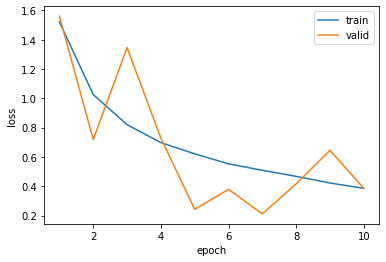

In [ ]:
# 아래에 train data와 validation data에 대한 loss 그래프 출력
plt.plot(x_axis, all_losses, label='train')
plt.plot(x_axis, valid_losses_list, label='valid')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend();

In [ ]:
correct, total=0, 0
predictions=[]

In [ ]:
model.eval();
with torch.no_grad():
    for i, data in enumerate(testloader, 0):
        inputs, labels= data[0].to(device), data[1].to(device)
        #inputs= inputs.view(-1, 32*32*3)
        outputs= model(inputs)
        #the class with the highest score
        _, predicted= torch.max(outputs.data, 1)
        predictions.append(outputs)
        total+= labels.size(0)
        correct+= (predicted==labels).sum().item()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
print(f' Accuracy score of: {correct/total}')

 Accuracy score of: 0.8154
